In [ ]:
Algunos mineros aseguran que observan unas rocas marrones que al principio parecian 
no diferenciarse del asteroide, pero que también serían indicadores de bauxita.

Con los nuevos datos recolectados R2 tratar de predecir la bauxita que tendrá un asteroide.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot  as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('R2.csv')

In [3]:
print(df.describe())

       violet_stone_count  brown_stone_count  bauxite_kg
count          100.000000         100.000000  100.000000
mean            71.910000         296.960000    5.620179
std             42.481153         109.093225    2.173096
min              2.000000         102.000000    2.099950
25%             31.750000         206.750000    3.641069
50%             67.500000         283.000000    5.652337
75%            109.000000         404.250000    7.556816
max            149.000000         499.000000    9.926847


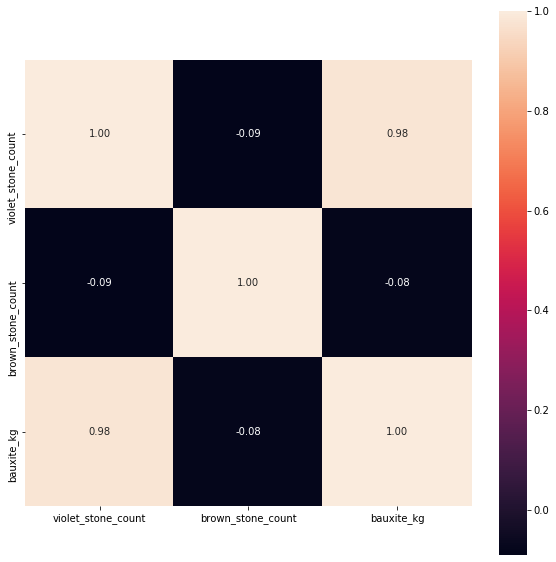

In [4]:
# Matriz de correlaciones como heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f')
plt.show()

In [ ]:
Se observa fuerte relacion lineal entre bauxita y violet_stone_count pero como bauxita sera mi target,
entonces no nos afectara en el entrenamiento de el modelo.

## Linear Regression Assumptions 

In [ ]:
https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/

In [ ]:
# SHOULD CHECK LINEAR REGRESSION Assumptions !!! See R3 analysis !!
I) Linearity
II) Normality of the Error Terms
III) No Multicollinearity among Predictors
IV) No Autocorrelation of the Error Terms
V) Homoscedasticity

## Entreno modelo 

In [5]:
def print_model_statistics(regr, y_test, y_pred):

    # The coefficients
    print('Coefficients: ', regr.coef_)

    # The intercept_ 
    print('Intercept (Y axis when X = 0): ', regr.intercept_)

    # The mean squared error
    print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

In [7]:
X = df[['violet_stone_count', 'brown_stone_count']]
y = df.bauxite_kg

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [8]:
regr = LinearRegression().fit(X_train, y_train)
y_pred = regr.predict(X_test)

print_model_statistics(regr, y_test, y_pred)

Coefficients:  [5.01149866e-02 5.96971370e-05]
Intercept (Y axis when X = 0):  1.9862965931409873
Mean squared error: 0.19
Coefficient of determination: 0.96

